# Logistic Regression

## Importing the libraries

In [30]:
import pandas as pd

## Importing the dataset

In [31]:
dataset = pd.read_csv('../Dataset/breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Logistic Regression model on the Training set

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [34]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  3]
 [ 3 47]]


## Computing the accuracy with k-Fold Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard Deviation: 1.97 %


# Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifierd = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model = classifierd.fit(X_train, y_train)

In [38]:
y_pred_d = classifierd.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmd = confusion_matrix(y_test, y_pred_d)
print(cmd)
accuracy_decision_tree = accuracy_score(y_test, y_pred_d)
accuracy_decision_tree

[[84  3]
 [ 3 47]]


0.9562043795620438

In [40]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 2.50
|   |--- feature_5 <= 2.50
|   |   |--- class: 2
|   |--- feature_5 >  2.50
|   |   |--- feature_7 <= 2.00
|   |   |   |--- feature_4 <= 5.00
|   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |--- feature_8 <= 4.00
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- feature_8 >  4.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_4 >  5.00
|   |   |   |   |--- class: 4
|   |   |--- feature_7 >  2.00
|   |   |   |--- class: 4
|--- feature_1 >  2.50
|   |--- feature_1 <= 4.50
|   |   |--- feature_5 <= 2.50
|   |   |   |--- feature_7 <= 2.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_7 >  2.50
|   |   |   |   |--- feature_0 <= 4.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  4.50
|   |   |   |   |   |--- feature_4 <= 7.00
|   |   |   |   |   |   |--- feature_4 <= 3.50
|   |   |   |   |   |   |   |--- feature_2 <= 4.00
|   |

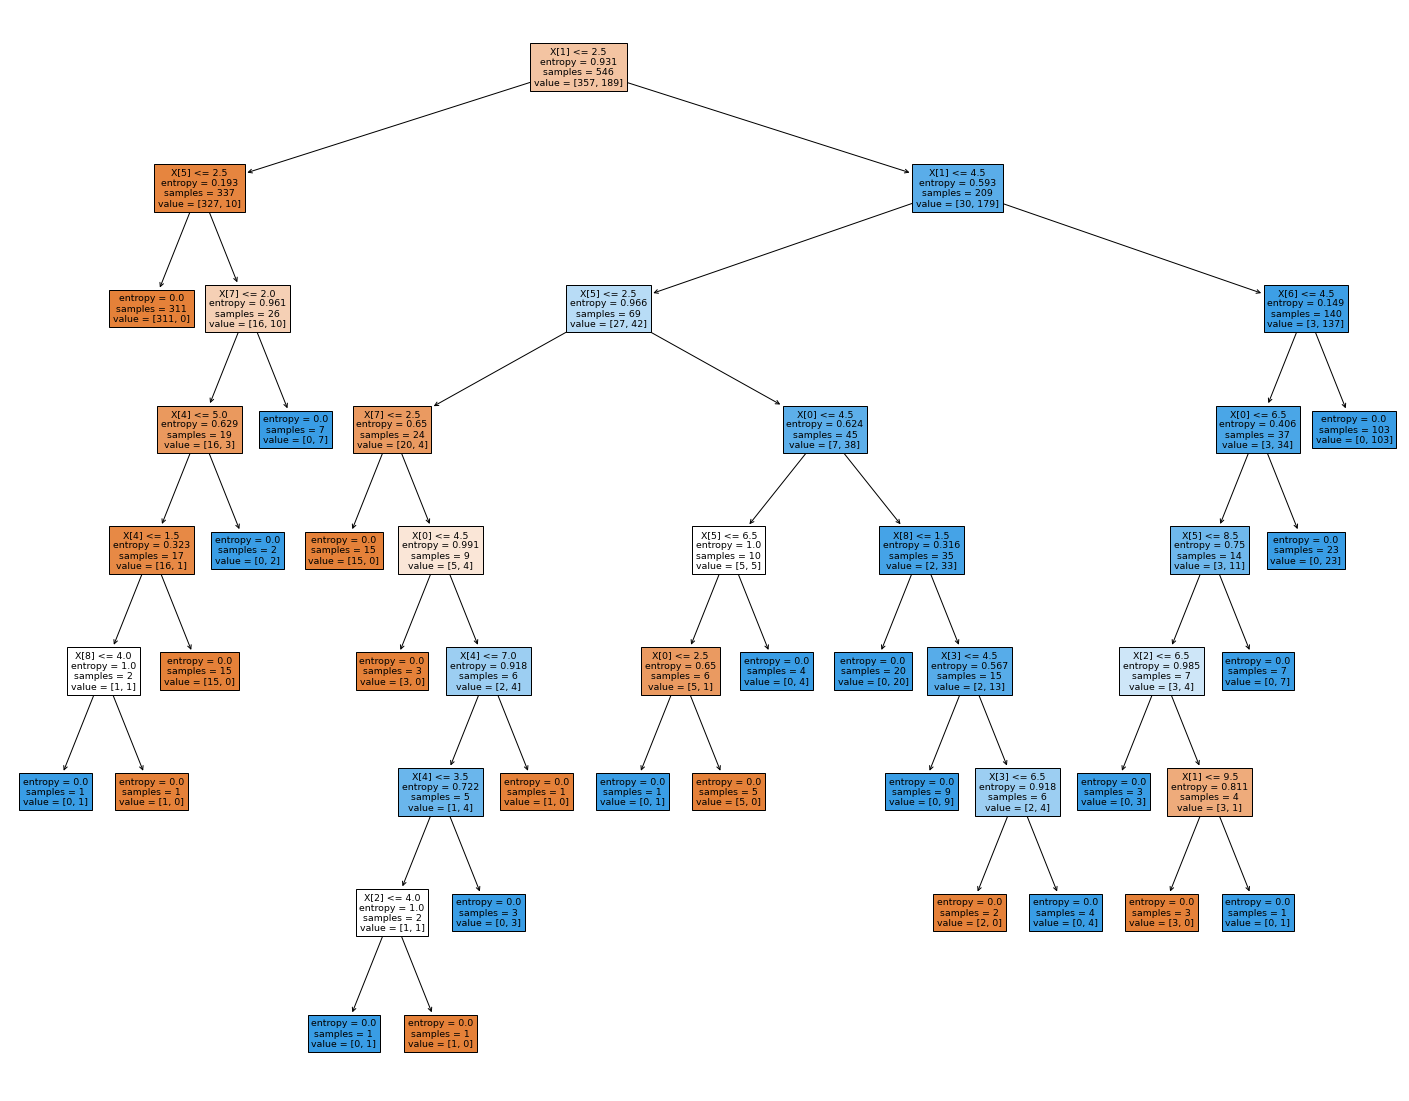

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True)
